In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline


print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))

pandas version: 1.0.1
numpy version: 1.18.2
matplotlib version: 3.2.0


In [90]:
df = pd.read_excel("./data/K-1_MI.xlsx", sheet_name="d2", verbose=True)
dfv = pd.read_excel("./data/K-1_MI.xlsx", sheet_name="d3", verbose=True)
dfv["date"] = pd.to_datetime(dfv["date"])
dfv = dfv.drop(["LT2", "LT3", "LT4", "TMA","PWA", "PWF", "WP2", "WS1","WS2", "TTWT"], axis=1)
df["date"] = pd.to_datetime(df["date"])
df = df.drop(["LT2", "LT3", "LT4", "TMA","PWA", "PWF", "WP2", "WS1","WS2", "TTWT"], axis=1)
df.head()

Reading sheet d2
Reading sheet d3


,date,FP05,LT1,TMB,TMC,TMD,TME,TMF,PWB,PWC,...,TTWS,PTWS,TW02,TW01,FW03,TW04,TW03,FW04,PTWT,PPW
0,2014-07-06 15:30:10,1068.9575,21.4107,76.1302,75.8843,74.866,75.0421,38.0252,29.7614,30.2302,...,179.844,19.3311,539.8597,301.2129,9.4894,539.5955,290.8920,14.2998,10.3202,3.5039
1,2014-07-06 15:30:20,1068.9575,21.4107,76.1302,75.8843,74.866,75.0421,38.0252,29.7614,30.2302,...,179.844,19.3311,539.8597,301.2129,9.4894,539.5955,290.8920,14.2998,10.3202,3.5039
2,2014-07-06 15:30:30,1068.9575,21.4107,76.1302,75.8843,74.866,75.0421,38.0252,29.7614,30.2302,...,179.844,19.3147,539.8597,301.2129,9.4894,539.5955,292.1826,14.2998,10.3202,3.4937
3,2014-07-06 15:30:40,1068.9575,21.4107,76.1302,75.8843,74.866,75.0421,38.0252,29.7614,30.2302,...,179.844,19.3298,539.8597,302.4265,9.4894,539.5955,292.1826,14.2998,10.3202,3.4937
4,2014-07-06 15:30:50,1068.9575,21.4107,76.1302,75.8843,74.866,75.0421,38.0252,29.7614,30.2302,...,179.844,19.3298,539.8597,302.4265,9.4894,539.5955,292.1826,14.2998,10.3202,3.4937


In [111]:
min_max_scaler = preprocessing.StandardScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df.drop(["date", "LT01"], axis=1).values))
df_scaled.head()
dfv_scaled = pd.DataFrame(min_max_scaler.transform(dfv.drop(["date", "LT01"], axis=1).values))


In [112]:
pca = PCA(0.99)
principal_components = pca.fit_transform(df_scaled.values)
pca_v = pca.transform(dfv_scaled)
pca_v = pd.DataFrame(data=pca_v)
pca_v.head()
principal_df = pd.DataFrame(data = principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.888982,-1.488428,0.850458,2.820325,0.857165,-0.788017,0.385353,0.718216,2.150199,1.688017,...,0.307586,-0.181695,0.157012,-0.293339,0.071342,-0.135904,0.031900,0.075967,0.290717,-0.095474
1,-2.059222,-1.677629,0.861463,2.745103,1.157342,-0.946627,0.766295,-0.091823,2.299578,1.965708,...,0.299206,-0.309140,-0.030949,-0.371020,0.025954,-0.104601,-0.007698,0.002124,0.267875,-0.088516
2,-1.768462,-1.340847,0.732701,2.775524,1.382143,-0.920454,0.444554,1.064417,2.549747,1.243130,...,0.430431,0.424795,-0.266094,-0.479994,-0.143770,-0.094223,0.145605,0.102765,0.181565,0.038944
3,-1.919922,-1.235948,0.798847,2.863838,1.095044,-0.716665,0.634234,0.096395,1.688574,1.947430,...,0.279535,0.179903,0.000016,-0.360638,0.045989,-0.172420,0.112758,0.063998,0.267072,0.012921
4,-2.067216,-1.350674,0.829907,2.893579,0.705785,-0.489258,0.577262,0.283764,1.457313,2.156981,...,0.226337,-0.206120,0.284559,-0.176873,0.099118,-0.145330,-0.019274,0.051450,0.364486,-0.038379


In [86]:
pca.explained_variance_ratio_

array([0.23178789, 0.19858253, 0.16965116, 0.05388016, 0.04001713,
       0.03908689, 0.03264422, 0.02687986, 0.02581449, 0.02303918,
       0.01991584, 0.01892378, 0.01739246, 0.01531489, 0.01354945,
       0.01235635, 0.0101991 , 0.0067295 , 0.00595917, 0.00526743,
       0.00472539, 0.00406545, 0.00392642, 0.00280236, 0.00259996,
       0.00209306, 0.00164848, 0.00152753])

In [87]:
df_rescaled = pd.DataFrame(pca.inverse_transform(principal_components))
df_rescaled.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.116586,-1.0,-0.602870,-1.324479,-0.133243,0.208682,-3.268592,-0.953319,-0.002715,-0.810192,...,-0.367783,-0.537338,-0.010807,0.040786,0.265782,-0.413738,0.450185,-0.157548,-0.510891,0.243395
1,0.106370,-1.0,-0.596142,-1.316252,-0.134276,0.201011,-3.266735,-0.972251,0.002573,-0.823450,...,-0.362696,-0.542127,-0.021852,0.046463,0.268921,-0.410927,0.454972,-0.140152,-0.511645,0.259805
2,-0.027862,-1.0,-0.576314,-1.335666,-0.131505,0.216454,-3.268764,-0.998080,-0.032839,-0.826116,...,-0.369947,-0.581584,-0.012910,0.074894,0.237680,-0.414355,0.495364,-0.277828,-0.545071,0.158420
3,0.024180,-1.0,-0.582073,-1.326372,-0.120261,0.198736,-3.275598,-0.987232,-0.027098,-0.813583,...,-0.367666,-0.554045,-0.051857,0.139038,0.163211,-0.435912,0.477204,-0.224578,-0.518262,0.099922
4,0.053418,-1.0,-0.589454,-1.325901,-0.116100,0.196849,-3.278068,-0.950520,-0.021608,-0.794694,...,-0.387977,-0.550207,-0.083969,0.147218,0.178790,-0.427056,0.484953,-0.171978,-0.509673,0.067270


In [100]:
from sklearn import linear_model
from sklearn.metrics import r2_score

y = df["LT01"]
model_pca = linear_model.LinearRegression()
model_pca.fit(principal_df.values, y.values)
y_model = model_pca.predict(principal_df.values)
err_l = y_model - y.values
r2_score(y_model, y.values)

-0.13170573933474028

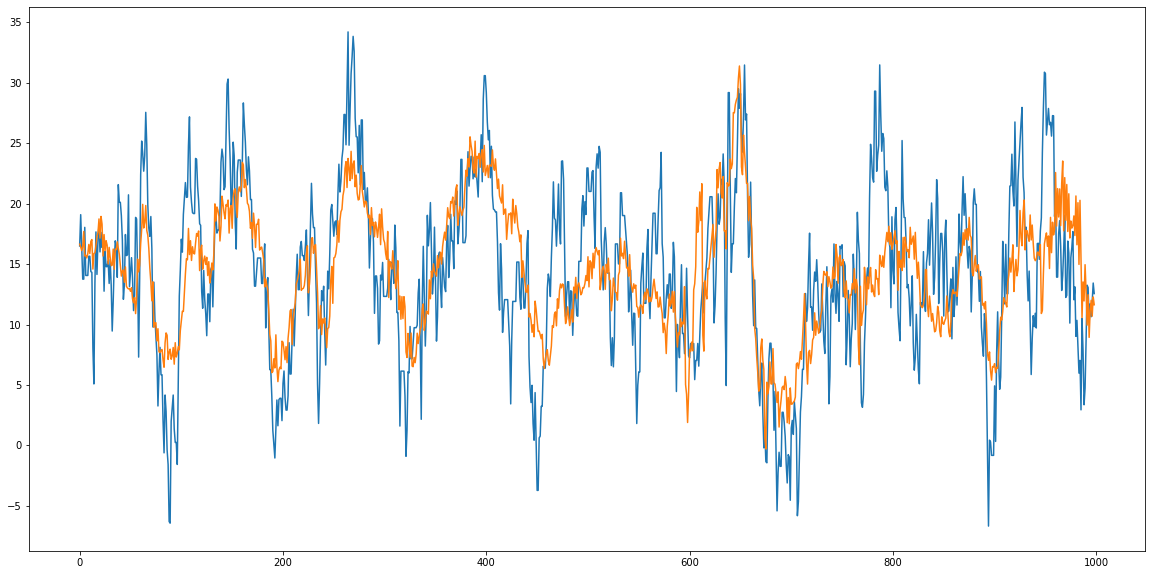

In [89]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(y.values)
plt.plot(y_model)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f476e12b438>]],
      dtype=object)

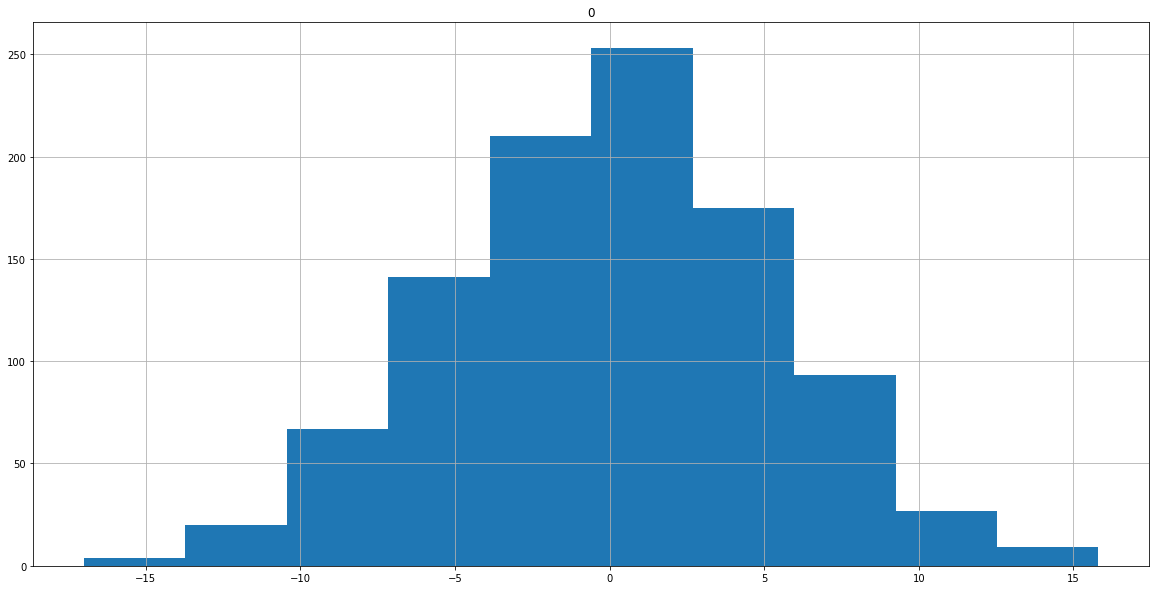

In [105]:
pd.DataFrame(err_l).hist()

-0.1650839408460909


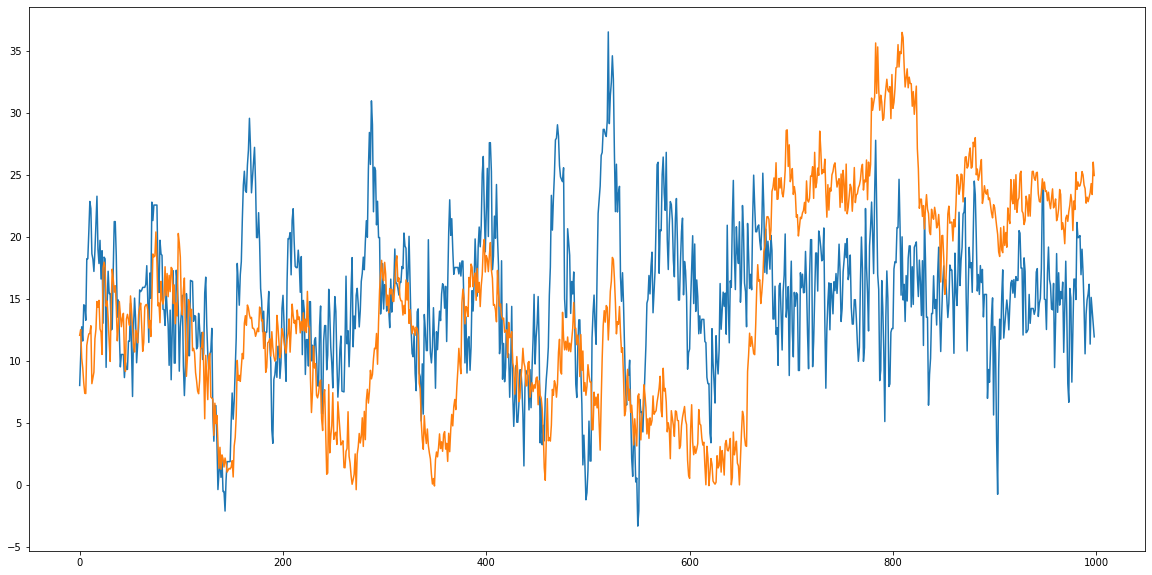

In [106]:
yv = dfv["LT01"]
yv_model = model_pca.predict(pca_v.values)
print(r2_score(yv_model, yv.values))
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(yv.values)
plt.plot(yv_model)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f476c2abd30>]],
      dtype=object)

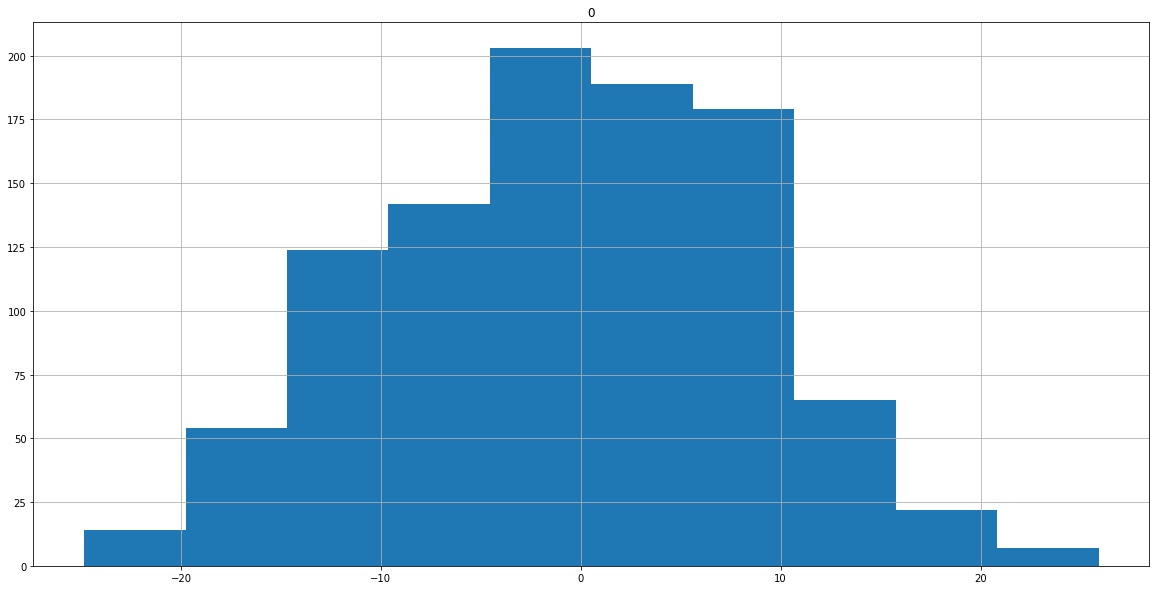

In [107]:
err_v = yv_model - yv.values
pd.DataFrame(err_v).hist()